In [164]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [165]:
tet = pd.read_csv("train.csv")

In [166]:
tet.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [167]:
len(tet.index)

891

#Analysing Data

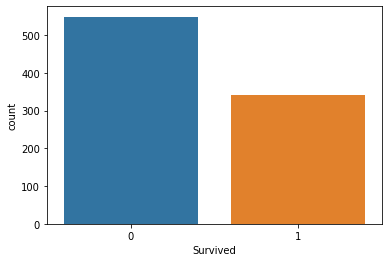

In [168]:
sns.countplot(x='Survived', data =tet)

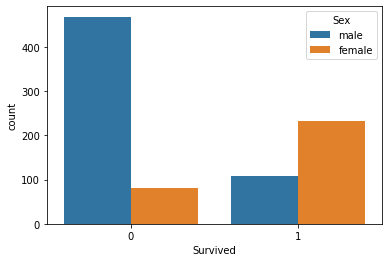

In [169]:
sns.countplot(x="Survived", hue="Sex", data=tet)

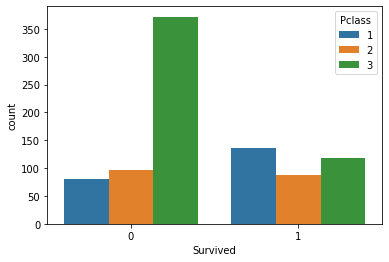

In [170]:
sns.countplot(x="Survived", hue="Pclass", data=tet)

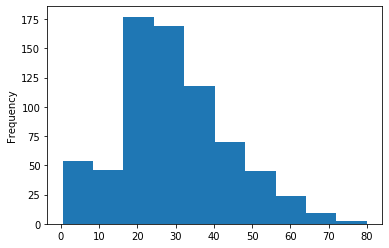

In [171]:
tet["Age"].plot.hist()

In [172]:
tet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
tet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
tet["Age"].mean()

29.69911764705882

In [175]:
tet["Age"]= tet.fillna({"Age":29.7})

In [176]:
tet.dropna(inplace= True)

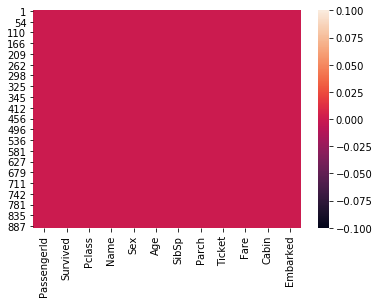

In [177]:
sns.heatmap(tet.isnull())

In [178]:
tet.drop("Cabin", axis=1, inplace=True)

In [179]:
tet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,7,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,11,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,12,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,872,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,873,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,880,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,888,0,0,112053,30.0000,S


In [180]:
tet["Sex"]= pd.get_dummies(tet["Sex"])

In [181]:
tet.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,7,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,11,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,12,0,0,113783,26.5500,S


In [182]:
embarked = pd.get_dummies(tet["Embarked"],drop_first=True)
pclass = pd.get_dummies(tet["Pclass"],drop_first=True)

embarked

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [183]:
tet = pd.concat([tet,pclass,embarked], axis=1)
tet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,113803,53.1000,S,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,7,0,0,17463,51.8625,S,0,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,11,1,1,PP 9549,16.7000,S,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",1,12,0,0,113783,26.5500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,872,1,1,11751,52.5542,S,0,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",0,873,0,0,695,5.0000,S,0,0,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,880,0,1,11767,83.1583,C,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,888,0,0,112053,30.0000,S,0,0,0,1


In [184]:
tet.drop('Name',axis=1, inplace=True)

In [185]:
tet.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,Q,S
1,2,1,1,1,2,1,0,PC 17599,71.2833,C,0,0,0,0
3,4,1,1,1,4,1,0,113803,53.1000,S,0,0,0,1
6,7,0,1,0,7,0,0,17463,51.8625,S,0,0,0,1
10,11,1,3,1,11,1,1,PP 9549,16.7000,S,0,1,0,1
11,12,1,1,1,12,0,0,113783,26.5500,S,0,0,0,1


In [198]:
tet=tet.drop(['Embarked','Ticket','PassengerId',"Pclass"], axis=1)

TRAIN DATASET


In [199]:
X = tet.drop("Survived", axis=1)
y= tet["Survived"]

In [200]:
X

,Sex,Age,SibSp,Parch,Fare,2,3,Q,S
1,1,2,1,0,71.2833,0,0,0,0
3,1,4,1,0,53.1000,0,0,0,1
6,0,7,0,0,51.8625,0,0,0,1
10,1,11,1,1,16.7000,0,1,0,1
11,1,12,0,0,26.5500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,872,1,1,52.5542,0,0,0,1
872,0,873,0,0,5.0000,0,0,0,1
879,1,880,0,1,83.1583,0,0,0,0
887,1,888,0,0,30.0000,0,0,0,1


In [201]:
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size= 0.3,random_state=42)

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
logistic = LogisticRegression()

In [217]:
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
y_model = logistic.predict(x_test)

In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8360655737704918